In [33]:
%matplotlib inline


# Betweeness Centrality

Betweenness centrality measures
Code source: https://networkx.org/documentation/latest/auto_examples/algorithms/plot_betweenness_centrality.html
Multigraph is not implemented for the connected components, so we use undirected graph.

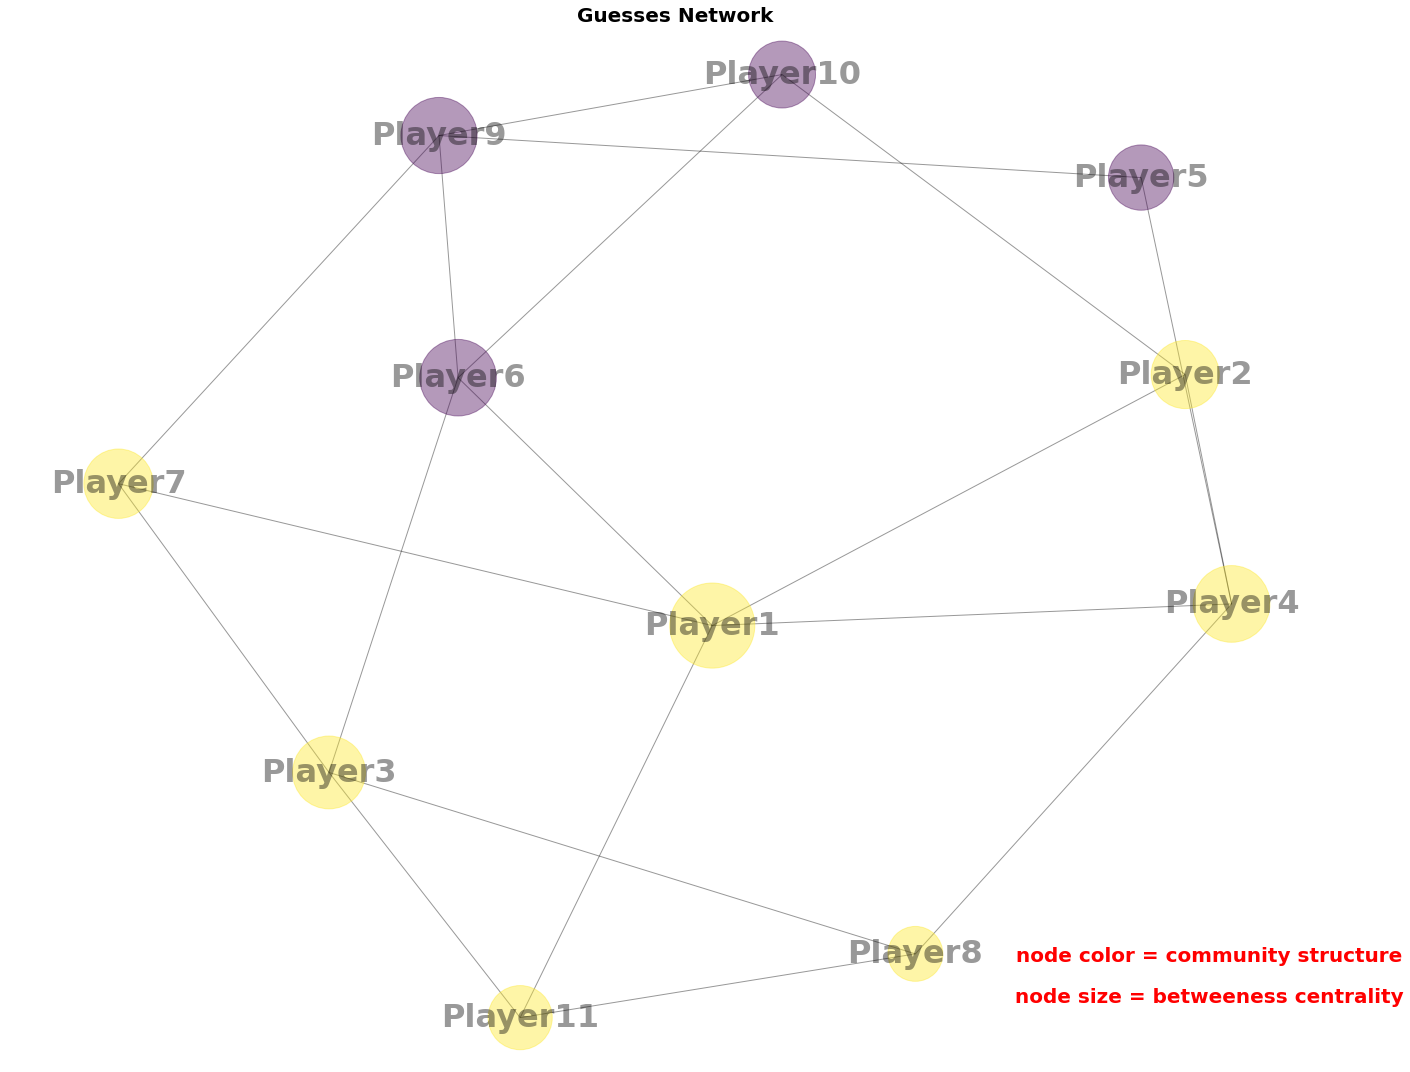

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

df_raw = pd.read_csv('../data/answers.csv',error_bad_lines=False)
G = nx.from_pandas_edgelist(df_raw, 'Player', 'Guess',)


# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=True,
    node_color=node_color,
    node_size=node_size,
    arrowsize = 20,
    font_size = 32,
    font_weight = "bold",
    #edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Guesses Network", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.90,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.90,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()